<a href="https://colab.research.google.com/github/WoradeeKongthong/wine_clustering/blob/master/03_wine_HierachicalClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

import plotly.express as px

# Data Set

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/WoradeeKongthong/wine_clustering/master/wine-clustering.csv')

In [3]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Note : Based on part 01 (EDA),  
the data set has no missing values,  
but has almost 10% are outliers.

Feature Engineering : Standardization using StandardScaler

In [0]:
X = df.loc[:,:]

# Hierachical Clustering

## Preprocessor

In [0]:
preprocessor = StandardScaler()
preprocessor.fit(X)
scaled_X = preprocessor.transform(X)

# Dendrogram

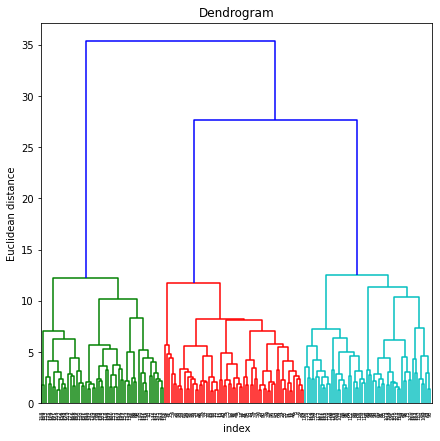

In [13]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(7,7))
dendrogram = sch.dendrogram(sch.linkage(scaled_X, method='ward'))

plt.title('Dendrogram')
plt.xlabel('index')
plt.ylabel('Euclidean distance')
plt.show()

Note : optimal number of cluster is 3

# Clustering

In [0]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = model.fit_predict(scaled_X)

# Results

index of wine records in each cluster

In [16]:
print('Cluster 1 : ',len(X[y_hc==0]),' records\n', X[y_hc==0].index.values)
print('\nCluster 2 : ',len(X[y_hc==1]),' records\n', X[y_hc==1].index.values)
print('\nCluster 3 : ',len(X[y_hc==2]),' records\n', X[y_hc==2].index.values)

Cluster 1 :  58  records
 [ 59  62  63  64  67  69  72  74  75  76  78  79  80  81  82  84  85  86
  87  88  89  90  91  92  93  94  95  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 119 120 122 123 124 125
 126 127 128 129]

Cluster 2 :  56  records
 [ 60  61  68  70  77  83  96 118 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177]

Cluster 3 :  64  records
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  65  66  71  73 121]


Note : clustering results is different from K-means Clustering

# Visualization
needs Principal Component Analysis

## Clustering in 2D

In [17]:
X

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


pca on X

In [19]:
pca = PCA(n_components = 2)
pca.fit(X)
pca_X = pca.transform(X)
explained_variance = pca.explained_variance_ratio_
print('PCA n_components = 2 explained_variance : ', explained_variance)
print('sum of explained_variance : ',explained_variance.sum())

PCA n_components = 2 explained_variance :  [0.99809123 0.00173592]
sum of explained_variance :  0.9998271461166032


Plot

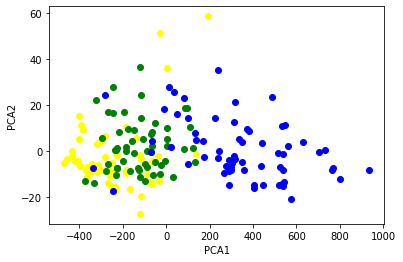

In [20]:
plt.scatter(pca_X[y_hc==0,0], pca_X[y_hc==0,1],c='yellow')
plt.scatter(pca_X[y_hc==1,0], pca_X[y_hc==1,1],c='green')
plt.scatter(pca_X[y_hc==2,0], pca_X[y_hc==2,1],c='blue')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

## Clustering in 3D

pca on X

In [21]:
pca = PCA(n_components = 3)
pca_X = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
print('PCA n_components = 3, explained_variance : ', explained_variance)
print('sum explained_variance : ',explained_variance.sum())

PCA n_components = 3, explained_variance :  [9.98091230e-01 1.73591562e-03 9.49589576e-05]
sum explained_variance :  0.9999221050741547


Create DataFrame for plotly

In [0]:
pcaX_3d_df = pd.DataFrame(pca_X, columns=['PCA1','PCA2','PCA3'])
pcaX_3d_df['cluster'] = y_hc

In [24]:
fig = px.scatter_3d(pcaX_3d_df, x='PCA1',y='PCA2',z='PCA3',color='cluster',hover_name=pcaX_3d_df.index.values)

fig.show()

[Click to see the 3D picture](https://github.com/WoradeeKongthong/wine_clustering/blob/master/hierarch3d.png)

feature values and clusters

In [0]:
X_result = X.copy()
X_result['cluster'] = y_hc

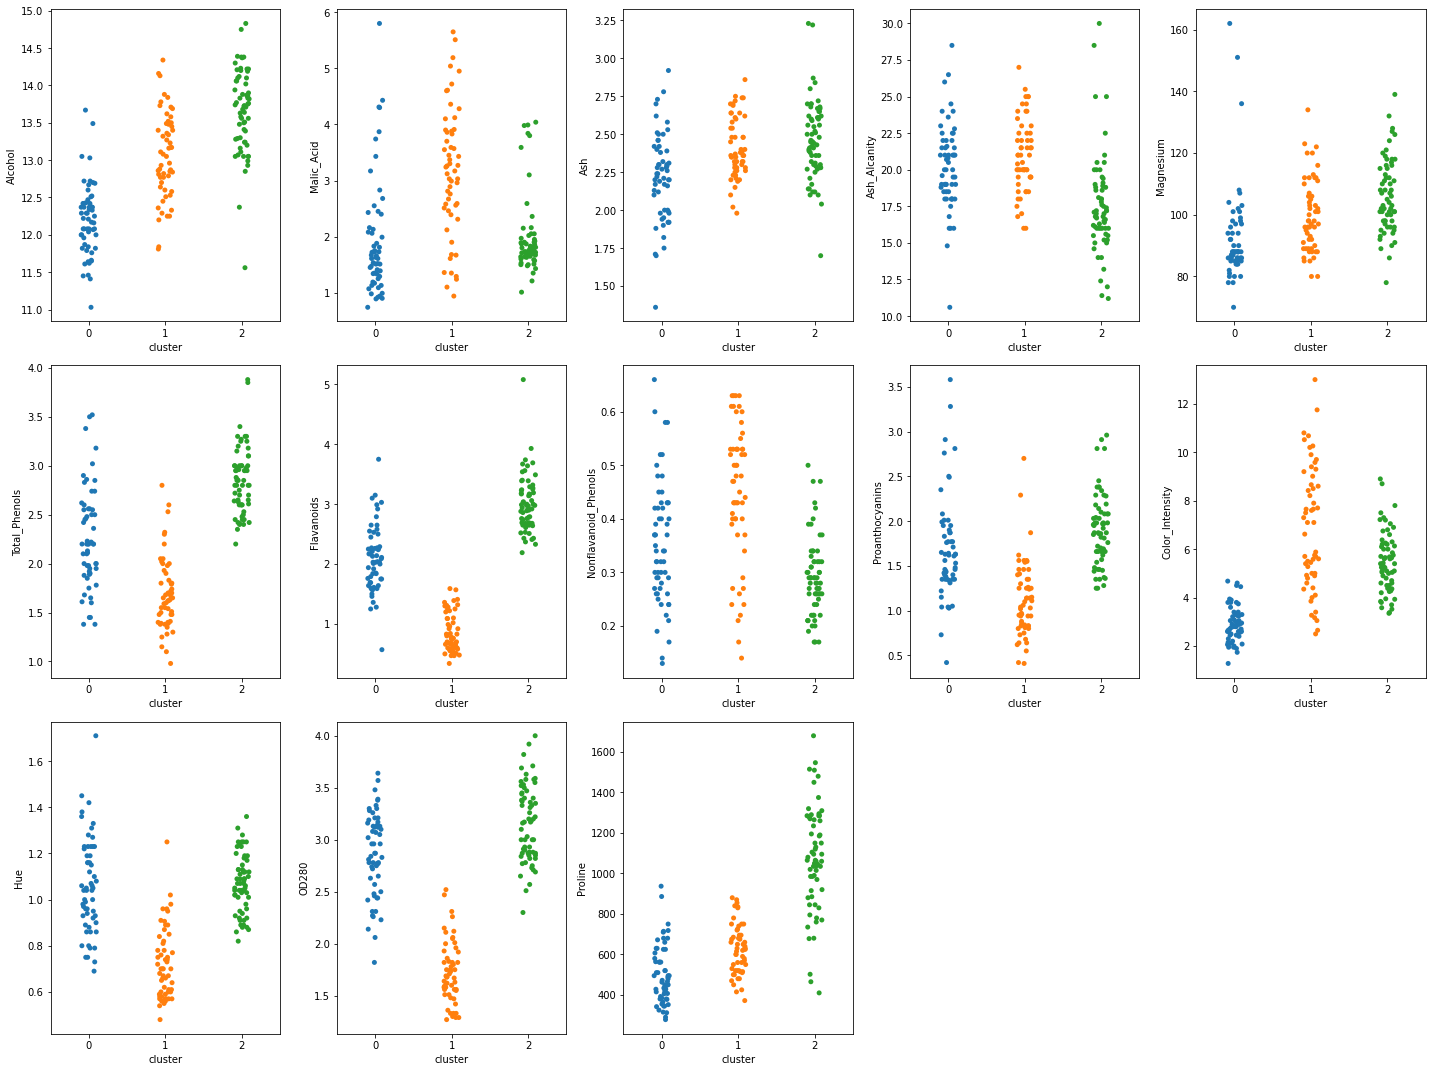

In [27]:
features = X.columns.values
index = 0

fig = plt.figure(figsize=(20,15))

for feature in features :
  fig.add_subplot(3,5,index+1)
  sns.stripplot(data=X_result, y=feature, x='cluster')
  index += 1
  if index > len(features):
    break

fig.tight_layout()
plt.show()